# **Analysis of Aconcagua Region**  

## **Introduction/ Business Problem**

### Background  

Chile is actually divided in 16 regions. All this regions has differents names dependending of important zones in those locations. Usually has the name of its Capitals.

In this analysis we'll focus in the Valparaíso Region. There has been a idea of a group of persons to separate the region in 2 different regions. In other words, a new region.
This would be a option to change the reality of many people of some cities. During all these years the city of Valparaíso (Capital of the region) and others coastal cities has been the most benefited in Public Works, Universities, the betters hospitals, etc. and is not fair, because the "back cities" (as the people call them) contribute the most important part in the regional GDP. This is because these cities have the mines and agriculture.  
In the last report of ‘Subsecretaría de Desarrollo Regional y Administrativo’, 3 territorial alternatives were disclosed: "Metropolitano", "Rural", "Histórica-Identitaria".
I will take the "Historica-Identitaria" alternative since is the best option according the report.


### Business Problem    

In this scenario is indispensable make a analysis using machine learning tools for a visualization of diferents cases that we can identify. This project could assist to the **Corporación Region Aconcagua**  to help to make a effective decisions in other plane. I have to mention and highlight that this project focuses in most part in a turistic view (later explained). The business problem that we are currently posing is: how could we identify if the Aconcagua region can be a new region and why?.  
To solve this problem, we will cluster the cities of the region and make different combinations in order to recommend all venues that should has the communes for new complete regions.  

## **Data section**

The data of all cities in the Valparaiso Region will be extracted from a Wikipedia page (https://es.wikipedia.org/wiki/Regi%C3%B3n_de_Valpara%C3%ADso). The table with the data will be manipulate to clean all columns because it is very noise and dirty.    
For other hand the Valparaíso Region also has within its cities to the "Isla de Pascua" and the "Isla Juan Fernández". This islands will be ignored for the project, because it is not relevant in this analysis.    
The latitudes and longitudes of each cities we obtain from **geopy** with **Nominatim** library. This will be use for get the location from all venues in the communes using the **Foursquare API** and merged with the principal DataFrame.  
And finally for a better visualisation we'll implement a chorolopleth map supported by a geojson file.   



Let's import our first libraries.

In [1]:
import urllib.request
from bs4 import BeautifulSoup

import geocoder
from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np
print('all import.')

all import.


In this point we are going to get the data froma Wikipedia page and clean it.

In [2]:
url = 'https://es.wikipedia.org/wiki/Regi%C3%B3n_de_Valpara%C3%ADso'

page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')

table = soup.find('table',{'class':'wikitable'})

table_rows = table.find_all('tr')

l = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)

df = pd.DataFrame(l, columns=['Provincia', 'Capital', 'Comuna'])

df['Comuna'][3,4,5] = [df['Provincia'][3], df['Provincia'][4], df['Provincia'][5]]
df['Provincia'][3,4,5] = 'Los Andes'
df['Capital'][3,4,5] = 'Los Andes'

df['Comuna'][7,8,9,10] = [df['Provincia'][7], df['Provincia'][8], df['Provincia'][9], df['Provincia'][10]]
df['Provincia'][7,8,9,10] = 'Petorca'
df['Capital'][7,8,9,10] = 'La Ligua'

df['Comuna'][12,13,14,15] = [df['Provincia'][12], df['Provincia'][13], df['Provincia'][14], df['Provincia'][15]]
df['Provincia'][12,13,14,15] = 'Quillota'
df['Capital'][12,13,14,15] = 'Quillota'

df['Comuna'][17,18,19,20,21] = [df['Provincia'][17], df['Provincia'][18], df['Provincia'][19], df['Provincia'][20], df['Provincia'][21]]
df['Provincia'][17,18,19,20,21] = 'San Antonio'
df['Capital'][17,18,19,20,21] = 'San Antonio'

df['Comuna'][23,24,25,26,27] = [df['Provincia'][23], df['Provincia'][24], df['Provincia'][25], df['Provincia'][26], df['Provincia'][27]]
df['Provincia'][22,23,24,25,26,27] = 'San Felipe'
df['Capital'][23,24,25,26,27] = 'San Felipe'

df['Comuna'][29,30,31,32,33,34] = [df['Provincia'][29], df['Provincia'][30], df['Provincia'][31], df['Provincia'][32], df['Provincia'][33], df['Provincia'][34]]
df['Provincia'][29,30,31,32,33,34] = 'Valparaíso'
df['Capital'][29,30,31,32,33,34] = 'Valparaíso'

df['Comuna'][36,37,38] = [df['Provincia'][36], df['Provincia'][37], df['Provincia'][38]]
df['Provincia'][36,37,38] = 'Marga Marga'
df['Capital'][36,37,38] = 'Quilpué'

df.replace({'\n':''}, regex=True, inplace=True)
df.replace('None', np.nan, inplace=True)
df.dropna(inplace=True)
df['Comuna'] = df['Comuna'].str.replace('\d+', '')
#df_map = df
# # Delete Isla de Pascua.
# df.drop(df.index[0], inplace=True)
# # drop Juan Fernandez Island
# df.drop(df.index[28], inplace= True)

# df.drop([21, 24], inplace=True) #Drop Panquegue and Santo Domingo(less than 3 venues)
# df.reset_index(drop=True, inplace=True)
df


Provincia      Capital           Comuna
1   Isla de Pascua    Hanga Roa   Isla de Pascua
2        Los Andes    Los Andes      Calle Larga
3        Los Andes    Los Andes        Los Andes
4        Los Andes    Los Andes        Rinconada
5        Los Andes    Los Andes      San Esteban
6          Petorca     La Ligua          Cabildo
7          Petorca     La Ligua         La Ligua
8          Petorca     La Ligua           Papudo
9          Petorca     La Ligua          Petorca
10         Petorca     La Ligua         Zapallar
11        Quillota     Quillota         Hijuelas
12        Quillota     Quillota        La Calera
13        Quillota     Quillota          La Cruz
14        Quillota     Quillota          Nogales
15        Quillota     Quillota         Quillota
16     San Antonio  San Antonio        Algarrobo
17     San Antonio  San Antonio        Cartagena
18     San Antonio  San Antonio        El Quisco
19     San Antonio  San Antonio          El Tabo
20     San Antonio  San Antonio      San Antonio
21     San Antonio  San Antonio    Santo Domingo
22      San Felipe   San Felipe           Catemu
23      San Felipe   San Felipe        Llay-Llay
24      San Felipe   San Felipe        Panquehue
25      San Felipe   San Felipe         Putaendo
26      San Felipe   San Felipe       San Felipe
27      San Felipe   San Felipe      Santa María
28      Valparaíso   Valparaíso       Casablanca
29      Valparaíso   Valparaíso           Concón
30      Valparaíso   Valparaíso   Juan Fernández
31      Valparaíso   Valparaíso       Puchuncaví
32      Valparaíso   Valparaíso         Quintero
33      Valparaíso   Valparaíso       Valparaíso
34      Valparaíso   Valparaíso     Viña del Mar
35     Marga Marga      Quilpué          Limache
36     Marga Marga      Quilpué            Olmué
37     Marga Marga      Quilpué          Quilpué
38     Marga Marga      Quilpué    Villa Alemana

Now, we have the table but we need the latitude and longitude. Therefor we got get this information from **geopy** library and Nominatim geocoder.


In [3]:
comunas = df['Comuna'] + ', CL'

lat_long = None
long = []
lat = []

for comuna in comunas:
    print(comuna)
    geolocator = Nominatim(user_agent="Vregion_venues", timeout=3)
    location = geolocator.geocode(comuna)
    lat.append(location.latitude)
    long.append(location.longitude)
    
df['Latitude'] = lat
df['Longitude'] = long
# df

 Isla de Pascua, CL
 Calle Larga, CL
 Los Andes, CL
 Rinconada, CL
 San Esteban, CL
 Cabildo, CL
 La Ligua, CL
 Papudo, CL
 Petorca, CL
 Zapallar, CL
 Hijuelas, CL
 La Calera, CL
 La Cruz, CL
 Nogales, CL
 Quillota, CL
 Algarrobo, CL
 Cartagena, CL
 El Quisco, CL
 El Tabo, CL
 San Antonio, CL
 Santo Domingo, CL
 Catemu, CL
 Llay-Llay, CL
 Panquehue, CL
 Putaendo, CL
 San Felipe, CL
 Santa María, CL
 Casablanca, CL
 Concón, CL
 Juan Fernández, CL
 Puchuncaví, CL
 Quintero, CL
 Valparaíso, CL
 Viña del Mar, CL
 Limache, CL
 Olmué, CL
 Quilpué, CL
 Villa Alemana, CL


In [4]:
df

Provincia      Capital           Comuna   Latitude   Longitude
1   Isla de Pascua    Hanga Roa   Isla de Pascua -27.125959 -109.349576
2        Los Andes    Los Andes      Calle Larga -32.855269  -70.626041
3        Los Andes    Los Andes        Los Andes -32.833687  -70.598161
4        Los Andes    Los Andes        Rinconada -32.872513  -70.712510
5        Los Andes    Los Andes      San Esteban -32.799054  -70.579581
6          Petorca     La Ligua          Cabildo -32.426591  -71.066330
7          Petorca     La Ligua         La Ligua -32.449638  -71.231669
8          Petorca     La Ligua           Papudo -32.507568  -71.445958
9          Petorca     La Ligua          Petorca -32.251699  -70.930910
10         Petorca     La Ligua         Zapallar -32.552829  -71.458818
11        Quillota     Quillota         Hijuelas -32.800058  -71.145221
12        Quillota     Quillota        La Calera -32.788981  -71.203546
13        Quillota     Quillota          La Cruz -32.827912  -71.227153
14        Quillota     Quillota          Nogales -32.731580  -71.202947
15        Quillota     Quillota         Quillota -32.879997  -71.247355
16     San Antonio  San Antonio        Algarrobo -33.369172  -71.668053
17     San Antonio  San Antonio        Cartagena -33.546849  -71.603171
18     San Antonio  San Antonio        El Quisco -33.400311  -71.693998
19     San Antonio  San Antonio          El Tabo -33.454585  -71.669107
20     San Antonio  San Antonio      San Antonio -33.580861  -71.613238
21     San Antonio  San Antonio    Santo Domingo -33.786234  -71.675723
22      San Felipe   San Felipe           Catemu -32.778421  -70.963343
23      San Felipe   San Felipe        Llay-Llay -32.888083  -70.887051
24      San Felipe   San Felipe        Panquehue -32.770577  -70.836130
25      San Felipe   San Felipe         Putaendo -32.626077  -70.716764
26      San Felipe   San Felipe       San Felipe -32.750717  -70.725090
27      San Felipe   San Felipe      Santa María -32.747875  -70.656738
28      Valparaíso   Valparaíso       Casablanca -33.320586  -71.410076
29      Valparaíso   Valparaíso           Concón -32.922004  -71.515957
30      Valparaíso   Valparaíso   Juan Fernández -33.644480  -78.839564
31      Valparaíso   Valparaíso       Puchuncaví -32.725986  -71.415007
32      Valparaíso   Valparaíso         Quintero -32.784022  -71.528336
33      Valparaíso   Valparaíso       Valparaíso -33.045846  -71.619675
34      Valparaíso   Valparaíso     Viña del Mar -33.024453  -71.551764
35     Marga Marga      Quilpué          Limache -33.001874  -71.265732
36     Marga Marga      Quilpué            Olmué -32.995618  -71.186211
37     Marga Marga      Quilpué          Quilpué -33.049813  -71.441528
38     Marga Marga      Quilpué    Villa Alemana -33.044190  -71.372546

We have modify the location from Llay-llay and Rinconada because it's a little off track.

In [5]:
df.at[4, 'Latitude' ]= -32.833329
df.at[4, 'Longitude'] = -70.688845

df.at[23, 'Latitude']= -32.841742
df.at[23, 'Longitude']= -70.953908
df

Provincia      Capital           Comuna   Latitude   Longitude
1   Isla de Pascua    Hanga Roa   Isla de Pascua -27.125959 -109.349576
2        Los Andes    Los Andes      Calle Larga -32.855269  -70.626041
3        Los Andes    Los Andes        Los Andes -32.833687  -70.598161
4        Los Andes    Los Andes        Rinconada -32.833329  -70.688845
5        Los Andes    Los Andes      San Esteban -32.799054  -70.579581
6          Petorca     La Ligua          Cabildo -32.426591  -71.066330
7          Petorca     La Ligua         La Ligua -32.449638  -71.231669
8          Petorca     La Ligua           Papudo -32.507568  -71.445958
9          Petorca     La Ligua          Petorca -32.251699  -70.930910
10         Petorca     La Ligua         Zapallar -32.552829  -71.458818
11        Quillota     Quillota         Hijuelas -32.800058  -71.145221
12        Quillota     Quillota        La Calera -32.788981  -71.203546
13        Quillota     Quillota          La Cruz -32.827912  -71.227153
14        Quillota     Quillota          Nogales -32.731580  -71.202947
15        Quillota     Quillota         Quillota -32.879997  -71.247355
16     San Antonio  San Antonio        Algarrobo -33.369172  -71.668053
17     San Antonio  San Antonio        Cartagena -33.546849  -71.603171
18     San Antonio  San Antonio        El Quisco -33.400311  -71.693998
19     San Antonio  San Antonio          El Tabo -33.454585  -71.669107
20     San Antonio  San Antonio      San Antonio -33.580861  -71.613238
21     San Antonio  San Antonio    Santo Domingo -33.786234  -71.675723
22      San Felipe   San Felipe           Catemu -32.778421  -70.963343
23      San Felipe   San Felipe        Llay-Llay -32.841742  -70.953908
24      San Felipe   San Felipe        Panquehue -32.770577  -70.836130
25      San Felipe   San Felipe         Putaendo -32.626077  -70.716764
26      San Felipe   San Felipe       San Felipe -32.750717  -70.725090
27      San Felipe   San Felipe      Santa María -32.747875  -70.656738
28      Valparaíso   Valparaíso       Casablanca -33.320586  -71.410076
29      Valparaíso   Valparaíso           Concón -32.922004  -71.515957
30      Valparaíso   Valparaíso   Juan Fernández -33.644480  -78.839564
31      Valparaíso   Valparaíso       Puchuncaví -32.725986  -71.415007
32      Valparaíso   Valparaíso         Quintero -32.784022  -71.528336
33      Valparaíso   Valparaíso       Valparaíso -33.045846  -71.619675
34      Valparaíso   Valparaíso     Viña del Mar -33.024453  -71.551764
35     Marga Marga      Quilpué          Limache -33.001874  -71.265732
36     Marga Marga      Quilpué            Olmué -32.995618  -71.186211
37     Marga Marga      Quilpué          Quilpué -33.049813  -71.441528
38     Marga Marga      Quilpué    Villa Alemana -33.044190  -71.372546

I will export the data for futures analysis if needed it.

In [6]:
df.to_csv(r'/Users/pirateorbit/MLProjects/Analysis_VRegion/V_Region.csv')

Now we can delete some rows for a better analysis. First we delete the two islands within to Valparaíso Region ( "La Isla de Pascua y La Isla de Juan Fernández"). And in a second step we are going to eliminate all communes with less than 4 venues. In this case we will remove "Panquehue" and "Santo Domingo". 

In [7]:
# # Delete Isla de Pascua.
# df.drop(df.index[0], inplace=True)
# # drop Juan Fernandez Island
# df.drop(df.index[28], inplace= True)

df.drop([1, 21, 24, 30], inplace=True) #Drop Panquegue and Santo Domingo(less than 3 venues)
df.reset_index(drop=True, inplace=True)
df

Provincia      Capital          Comuna   Latitude  Longitude
0     Los Andes    Los Andes     Calle Larga -32.855269 -70.626041
1     Los Andes    Los Andes       Los Andes -32.833687 -70.598161
2     Los Andes    Los Andes       Rinconada -32.833329 -70.688845
3     Los Andes    Los Andes     San Esteban -32.799054 -70.579581
4       Petorca     La Ligua         Cabildo -32.426591 -71.066330
5       Petorca     La Ligua        La Ligua -32.449638 -71.231669
6       Petorca     La Ligua          Papudo -32.507568 -71.445958
7       Petorca     La Ligua         Petorca -32.251699 -70.930910
8       Petorca     La Ligua        Zapallar -32.552829 -71.458818
9      Quillota     Quillota        Hijuelas -32.800058 -71.145221
10     Quillota     Quillota       La Calera -32.788981 -71.203546
11     Quillota     Quillota         La Cruz -32.827912 -71.227153
12     Quillota     Quillota         Nogales -32.731580 -71.202947
13     Quillota     Quillota        Quillota -32.879997 -71.247355
14  San Antonio  San Antonio       Algarrobo -33.369172 -71.668053
15  San Antonio  San Antonio       Cartagena -33.546849 -71.603171
16  San Antonio  San Antonio       El Quisco -33.400311 -71.693998
17  San Antonio  San Antonio         El Tabo -33.454585 -71.669107
18  San Antonio  San Antonio     San Antonio -33.580861 -71.613238
19   San Felipe   San Felipe          Catemu -32.778421 -70.963343
20   San Felipe   San Felipe       Llay-Llay -32.841742 -70.953908
21   San Felipe   San Felipe        Putaendo -32.626077 -70.716764
22   San Felipe   San Felipe      San Felipe -32.750717 -70.725090
23   San Felipe   San Felipe     Santa María -32.747875 -70.656738
24   Valparaíso   Valparaíso      Casablanca -33.320586 -71.410076
25   Valparaíso   Valparaíso          Concón -32.922004 -71.515957
26   Valparaíso   Valparaíso      Puchuncaví -32.725986 -71.415007
27   Valparaíso   Valparaíso        Quintero -32.784022 -71.528336
28   Valparaíso   Valparaíso      Valparaíso -33.045846 -71.619675
29   Valparaíso   Valparaíso    Viña del Mar -33.024453 -71.551764
30  Marga Marga      Quilpué         Limache -33.001874 -71.265732
31  Marga Marga      Quilpué           Olmué -32.995618 -71.186211
32  Marga Marga      Quilpué         Quilpué -33.049813 -71.441528
33  Marga Marga      Quilpué   Villa Alemana -33.044190 -71.372546

This looking better. Now we should be able to pass to the next step.

# Methodology
In this part we have implement the criteria of the decisions we have to make. In this analysis we choose to implement the K-means algorithm. K-means is the best algorithm for this propose, since it will allow us to visualize the different categories in a simpler way and thus be able to make informed decisions.

In first step we have obtain the venues in each cities. Here we'll observe the density of venues and see a preview analysis.

Second step, we have plot the diferents cities in our map.

The third step will help us to identify the most popular venues (the four most common) in ecah cities and this will alows to dive in a specific task. We have to implement the K-means algorithm for separate the cities in clusters. 

Four step will start when we have a name and a first analysis from our clusters. In this step we'll make 2 differents dataframes with the cities in each new regions. Within Aconcagua region we have the following cities:

- Calle Larga,
- Los Andes
- Rinconada
- San Esteban
- Cabildo
- La Ligua
- Papudo
- Petorca
- Zapallar
- Catemu
- Llaillay
- Putaendo
- San Felipe
- Santa María
- Panquehue

And the Valparaiso region with:

- Hijuelas
- Calera
- La Cruz
- Nogales
- Quillota
- Algarrobo
- Cartagena
- El Quisco
- El Tabo
- San Antonio
- Casablanca
- Concón
- Puchuncaví
- Quintero
- Valparíso
- Viña del Mar
- Limache
- Olmué
- Quilpué
- Villa Alemana

In the five and final step we have to implement the K-means algorithm for each of two new tables to obtain the new clusters. This alows us to will make a specific analysis for this new regions and show to the stakeholders a estimative for each communes and visualize how could open new posiblities for the citizen of the smallest cities. 

In [8]:
import json

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim
import folium 

print('Libraries imported...')

Libraries imported...


To visualise the map of the Valparaíso Region we need the latitude and longitude. So, we implement the code for get this information.

In [9]:
vregion_address = 'Region de Valparaiso, CL'

vregion_location = geolocator.geocode(vregion_address)
region_lat = vregion_location.latitude
region_long = vregion_location.longitude 
print('The latitude is: {} and longitude:{}'.format(region_lat, region_long))

The latitude is: -32.5976089 and longitude:-70.8529753


In [10]:
Vregion_map = folium.Map(location=[region_lat, region_long], zoom_start=8.5)

for lat, lon, prov, cap, city in zip(df['Latitude'], df['Longitude'],df['Provincia'], df['Capital'], df['Comuna']):
    label = 'Provincia:{}, Capital: {}, Comuna: {}'.format(prov, cap, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lon],
                      radius = 5,
                      popup = label,
                      color = 'blue',
                      fill = True,
                      fill_color = '#3186cc',
                      fill_opacity = 0.7,
                      parse_html = False).add_to(Vregion_map)
    
Vregion_map

# FourSquare API
In this particular step we will get the popular venues in the Valparaiso Region and merged with the principal Dataframe of Comunas. In this exploration we have to implement the API URL with differents parameters, we need a Client_ID, Secret_ID, the Version, and the Radius that will be 750 meters and a limit of 100 venues.

In [11]:
CLIENT_ID='ES4CQGD2D4AKW4N1RBCP15YV1RF05QUTNOU0TLNAN10TV3MN'
CLIENT_SECRET='DCDJQHXXJOCGX00H3BTS0O32IRGJSAJZ4OUNM1GM2GPRAGGC'
VERSION='20180605'
RADIUS= 750
LIMIT=100

We will create a function with some parameters to explore the communes with our coordinates and create a new DataFrame with all the venues that the Foursquare can find.

In [12]:
import requests

def get_nearby_venues(provincias ,comunas, latitudes, longitudes, radius = 750):
    venues_list = []
    for prov, comuna, lat, lon in zip(provincias, comunas, latitudes, longitudes):
        print(comuna)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lon, radius, LIMIT)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            prov,
            comuna,
            lat,
            lon,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Provincia',
                                 'Comuna',
                                 'Comuna Latitude',
                                 'Comuna Longitude',
                                 'Venue',
                                 'Venue Latitude',
                                 'Venue Longitude',
                                 'Venue Category']
    
    return(nearby_venues)
    

In [14]:
Vregion_venues = get_nearby_venues(df['Provincia'], df['Comuna'], df['Latitude'], df['Longitude'])

 Calle Larga
 Los Andes
 Rinconada
 San Esteban
 Cabildo
 La Ligua
 Papudo
 Petorca
 Zapallar
 Hijuelas
 La Calera
 La Cruz
 Nogales
 Quillota
 Algarrobo
 Cartagena
 El Quisco
 El Tabo
 San Antonio
 Catemu
 Llay-Llay
 Putaendo
 San Felipe
 Santa María
 Casablanca
 Concón
 Puchuncaví
 Quintero
 Valparaíso
 Viña del Mar
 Limache
 Olmué
 Quilpué
 Villa Alemana


In [15]:
Vregion_venues.shape

(760, 8)

We have 760 venues. Not bad.

# Valparaíso Region (Complete)
 Let's analyze the complete region for obtain differents characteristics.

In [16]:
Vregion_venues.head()

Provincia        Comuna  Comuna Latitude  Comuna Longitude  \
0  Los Andes   Calle Larga       -32.855269        -70.626041   
1  Los Andes   Calle Larga       -32.855269        -70.626041   
2  Los Andes   Calle Larga       -32.855269        -70.626041   
3  Los Andes   Calle Larga       -32.855269        -70.626041   
4  Los Andes     Los Andes       -32.833687        -70.598161   

                     Venue  Venue Latitude  Venue Longitude     Venue Category  
0              Punto Copec      -32.852927       -70.624162  Food & Drink Shop  
1        Plaza Calle Larga      -32.855078       -70.626138              Plaza  
2      Estadio Calle Larga      -32.856042       -70.626004     Soccer Stadium  
3  Supermercado Los Robles      -32.859045       -70.624035  Convenience Store  
4                 El Vagón      -32.832806       -70.599254        Pizza Place

## Venues Histogram
Now let's modify our dataframe to obtain the total of venues for each Communes and comparate it.

In [17]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 

In [18]:
region_grouped = Vregion_venues.groupby('Comuna').count()
region_grouped = region_grouped.loc[:, ['Venue']]
region_grouped

Venue
Comuna               
 Algarrobo         26
 Cabildo            5
 Calle Larga        4
 Cartagena         11
 Casablanca        10
 Catemu             7
 Concón            40
 El Quisco         30
 El Tabo           22
 Hijuelas           4
 La Calera          4
 La Cruz            8
 La Ligua          19
 Limache           14
 Llay-Llay          5
 Los Andes         42
 Nogales            9
 Olmué             15
 Papudo            31
 Petorca            6
 Puchuncaví         4
 Putaendo           7
 Quillota          37
 Quilpué           57
 Quintero          15
 Rinconada          4
 San Antonio       29
 San Esteban        4
 San Felipe        38
 Santa María        6
 Valparaíso       100
 Villa Alemana     41
 Viña del Mar      88
 Zapallar          18

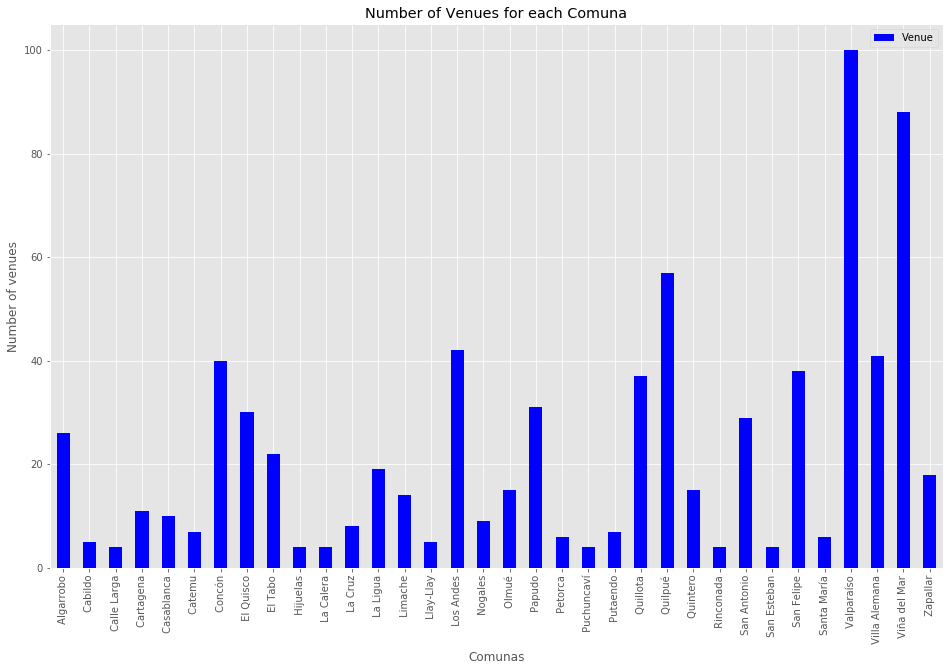

In [19]:
region_grouped.plot(kind='bar', figsize=(16,10), color = 'blue')

plt.xlabel('Comunas')
plt.ylabel('Number of venues')
plt.title('Number of Venues for each Comuna')

plt.show()

Now in this histogram we can see the difference from all cities in the V región. This show us that Valpariso and Viña del Mar have the more densinty of venues. This two cities within Valparíso Region side. The follows Villa Alemana, Quilpue and Los Andes with a range of 61 to 60 venues. After Concón, El Quisco, El Tabo, Papudo, Quillota, San Antonio, San Felipe, and Algarrobo with more than 20 but less than 40 venues. And the rest communes with less than 20 and with a minimum of 4 venues.   

Now we will prepared a one-hot encoding DataFrame to show the most common venues in each commune. 

In [20]:
Vregion_onehot = pd.get_dummies(Vregion_venues[['Venue Category']], prefix="", prefix_sep="")

Vregion_onehot['Comuna'] = Vregion_venues['Comuna']

fixed_columns = [Vregion_onehot.columns[-1]] + list(Vregion_onehot.columns[:-1])
Vregion_onehot = Vregion_onehot[fixed_columns]

Vregion_onehot.head()

Comuna  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0   Calle Larga       0            0           0                    0   
1   Calle Larga       0            0           0                    0   
2   Calle Larga       0            0           0                    0   
3   Calle Larga       0            0           0                    0   
4     Los Andes       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Austrian Restaurant  BBQ Joint  \
0                 0                   0                    0          0   
1                 0                   0                    0          0   
2                 0                   0                    0          0   
3                 0                   0                    0          0   
4                 0                   0                    0          0   

   Bagel Shop  ...  Surf Spot  Sushi Restaurant  Tea Room  Tennis Court  \
0           0  ...          0                 0         0             0   
1           0  ...          0                 0         0             0   
2           0  ...          0                 0         0             0   
3           0  ...          0                 0         0             0   
4           0  ...          0                 0         0             0   

   Theater  Trail  Train Station  Vegetarian / Vegan Restaurant  Vineyard  \
0        0      0              0                              0         0   
1        0      0              0                              0         0   
2        0      0              0                              0         0   
3        0      0              0                              0         0   
4        0      0              0                              0         0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 140 columns]

In [21]:
Vregion_grouped = Vregion_onehot.groupby('Comuna').mean().reset_index()
Vregion_grouped

Comuna    Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0        Algarrobo  0.000000         0.00    0.000000             0.000000   
1          Cabildo  0.000000         0.00    0.000000             0.000000   
2      Calle Larga  0.000000         0.00    0.000000             0.000000   
3        Cartagena  0.000000         0.00    0.000000             0.000000   
4       Casablanca  0.000000         0.00    0.000000             0.000000   
5           Catemu  0.000000         0.00    0.000000             0.000000   
6           Concón  0.000000         0.00    0.000000             0.000000   
7        El Quisco  0.000000         0.00    0.000000             0.033333   
8          El Tabo  0.000000         0.00    0.000000             0.090909   
9         Hijuelas  0.000000         0.00    0.000000             0.000000   
10       La Calera  0.000000         0.00    0.000000             0.000000   
11         La Cruz  0.000000         0.00    0.000000             0.000000   
12        La Ligua  0.000000         0.00    0.000000             0.000000   
13         Limache  0.000000         0.00    0.071429             0.000000   
14       Llay-Llay  0.000000         0.00    0.000000             0.000000   
15       Los Andes  0.000000         0.00    0.000000             0.000000   
16         Nogales  0.000000         0.00    0.000000             0.000000   
17           Olmué  0.000000         0.00    0.000000             0.000000   
18          Papudo  0.000000         0.00    0.000000             0.000000   
19         Petorca  0.000000         0.00    0.000000             0.000000   
20      Puchuncaví  0.000000         0.00    0.000000             0.000000   
21        Putaendo  0.000000         0.00    0.000000             0.000000   
22        Quillota  0.000000         0.00    0.000000             0.000000   
23         Quilpué  0.017544         0.00    0.000000             0.000000   
24        Quintero  0.000000         0.00    0.000000             0.000000   
25       Rinconada  0.000000         0.00    0.000000             0.000000   
26     San Antonio  0.000000         0.00    0.000000             0.000000   
27     San Esteban  0.000000         0.00    0.000000             0.000000   
28      San Felipe  0.026316         0.00    0.000000             0.000000   
29     Santa María  0.000000         0.00    0.000000             0.000000   
30      Valparaíso  0.000000         0.01    0.000000             0.000000   
31   Villa Alemana  0.000000         0.00    0.000000             0.000000   
32    Viña del Mar  0.011364         0.00    0.011364             0.011364   
33        Zapallar  0.000000         0.00    0.000000             0.000000   

    Asian Restaurant  Athletics & Sports  Austrian Restaurant  BBQ Joint  \
0           0.000000             0.00000                 0.00   0.000000   
1           0.000000             0.00000                 0.00   0.000000   
2           0.000000             0.00000                 0.00   0.000000   
3           0.000000             0.00000                 0.00   0.000000   
4           0.000000             0.00000                 0.00   0.000000   
5           0.000000             0.00000                 0.00   0.000000   
6           0.000000             0.00000                 0.00   0.000000   
7           0.000000             0.00000                 0.00   0.000000   
8           0.000000             0.00000                 0.00   0.000000   
9           0.000000             0.00000                 0.00   0.000000   
10          0.000000             0.00000                 0.00   0.000000   
11          0.125000             0.00000                 0.00   0.000000   
12          0.000000             0.00000                 0.00   0.000000   
13          0.000000             0.00000                 0.00   0.000000   
14          0.000000             0.00000                 0.00   0.000000   
15          0.047619             0.00000                 0.00   0

We'll create a new function to obtain a sorted DataFrame to the 4 most popular venues. This because some communes only have 4 venues as maximum .

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now we implements a new table with a ranking of the 4 most common venues for each city.

In [23]:
num_top_venues = 4

indicators =['st', 'nd', 'rd']

columns = ['Comuna']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
comuna_venues_sorted = pd.DataFrame(columns=columns)
comuna_venues_sorted['Comuna'] = Vregion_grouped['Comuna']

for ind in np.arange(Vregion_grouped.shape[0]):
    comuna_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vregion_grouped.iloc[ind, :], num_top_venues)
    
comuna_venues_sorted

Comuna 1st Most Common Venue       2nd Most Common Venue  \
0        Algarrobo            Restaurant                      Bakery   
1          Cabildo                 Plaza                  Restaurant   
2      Calle Larga     Convenience Store                       Plaza   
3        Cartagena            Restaurant          Seafood Restaurant   
4       Casablanca         Grocery Store                    Pharmacy   
5           Catemu   Peruvian Restaurant                Cocktail Bar   
6           Concón    Seafood Restaurant                  Restaurant   
7        El Quisco    Seafood Restaurant                       Beach   
8          El Tabo    Seafood Restaurant                       Beach   
9         Hijuelas                  Park  Construction & Landscaping   
10       La Calera        Soccer Stadium                 Supermarket   
11         La Cruz           Coffee Shop                    Pharmacy   
12        La Ligua        Sandwich Place                  Restaurant   
13         Limache           Supermarket                    Pharmacy   
14       Llay-Llay     Food & Drink Shop                    Pharmacy   
15       Los Andes            Restaurant            Sushi Restaurant   
16         Nogales                  Farm       Outdoors & Recreation   
17           Olmué            Restaurant                      Resort   
18          Papudo                 Beach                  Restaurant   
19         Petorca            Restaurant                   Nightclub   
20      Puchuncaví             Nightclub                       Diner   
21        Putaendo            Restaurant   Latin American Restaurant   
22        Quillota                   Bar            Sushi Restaurant   
23         Quilpué            Restaurant                    Pharmacy   
24        Quintero  Fast Food Restaurant                    Pharmacy   
25       Rinconada                Bakery                       Plaza   
26     San Antonio            Restaurant          Seafood Restaurant   
27     San Esteban         Hot Dog Joint                  Playground   
28      San Felipe                 Diner            Sushi Restaurant   
29     Santa María                Hostel                       Plaza   
30      Valparaíso            Restaurant                         Bar   
31   Villa Alemana      Sushi Restaurant                  Restaurant   
32    Viña del Mar       Bed & Breakfast        Fast Food Restaurant   
33        Zapallar    Seafood Restaurant               Grocery Store   

   3rd Most Common Venue 4th Most Common Venue  
0                  Beach           Fish Market  
1            Bus Station           Yoga Studio  
2         Soccer Stadium     Food & Drink Shop  
3                  Beach              Pharmacy  
4               Vineyard                  Park  
5                  Field           Pizza Place  
6    Empanada Restaurant                 Plaza  
7             Restaurant             Nightclub  
8    Arts & Crafts Store            Restaurant  
9                  Plaza        Soccer Stadium  
10         Moving Target           Yoga Studio  
11                  Park         Shopping Mall  
12                 Plaza     Convenience Store  
13          Soccer Field                Bakery  
14                 Plaza                 Field  
15                  Park                   Pub  
16                 Trail         Shopping Mall  
17                 Hotel                 Plaza  
18    Seafood Restaurant           Coffee Shop  
19              Pharmacy                 Plaza  
20                 Plaza                 Beach  
21                  Park                 Plaza  
22                   Gym     Food & Drink Shop  
23                   Pub        Sandwich Place  
24       Harbor / Marina                   Pub  
25      Sushi Restaurant          Cocktail Bar  
26        Sandwich Place                 Hotel  
27                 Plaza               Brewery  
28              Pharmacy                  Café  
29      Football Stad

# Valparaíso Region  
In this section we will implement our K-means algorithm to obtain the clusters of our communes. This will be calculated for a elbow method that would tell us the correct number of K to choose. Then we'll put our clusters in the map. 

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
Vregion_grouped_cluster = Vregion_grouped.drop('Comuna', 1)
Vregion_grouped_cluster.head()

Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0     0.0          0.0         0.0                  0.0               0.0   
1     0.0          0.0         0.0                  0.0               0.0   
2     0.0          0.0         0.0                  0.0               0.0   
3     0.0          0.0         0.0                  0.0               0.0   
4     0.0          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Austrian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0                 0.0                  0.0        0.0         0.0  0.115385   
1                 0.0                  0.0        0.0         0.0  0.000000   
2                 0.0                  0.0        0.0         0.0  0.000000   
3                 0.0                  0.0        0.0         0.0  0.090909   
4                 0.0                  0.0        0.0         0.0  0.000000   

   ...  Surf Spot  Sushi Restaurant  Tea Room  Tennis Court  Theater  Trail  \
0  ...        0.0               0.0       0.0           0.0      0.0    0.0   
1  ...        0.0               0.0       0.0           0.0      0.0    0.0   
2  ...        0.0               0.0       0.0           0.0      0.0    0.0   
3  ...        0.0               0.0       0.0           0.0      0.0    0.0   
4  ...        0.0               0.0       0.0           0.0      0.1    0.0   

   Train Station  Vegetarian / Vegan Restaurant  Vineyard  Yoga Studio  
0            0.0                            0.0       0.0          0.0  
1            0.0                            0.0       0.0          0.0  
2            0.0                            0.0       0.0          0.0  
3            0.0                            0.0       0.0          0.0  
4            0.0                            0.0       0.1          0.0  

[5 rows x 139 columns]

### Elbow method


Text(0.5, 1.0, 'Elbow method')

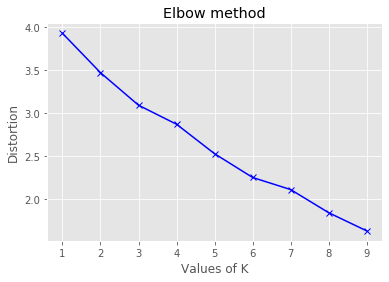

In [26]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Vregion_grouped_cluster)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 10), distortions, 'bx-')
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow method')

This elbow method is very confussed to choose a correct number. The slope is no clear and the graph is overfitting. So, I will implement the **Silhouette Coefficient** function. This will show us the better alternative for our data.

In [27]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit(Vregion_grouped_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Vregion_grouped_cluster, preds.labels_)
    print("For n_clusters = {}, silhouette score is {} ".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2610919665140031 
For n_clusters = 3, silhouette score is 0.19507412651511724 
For n_clusters = 4, silhouette score is 0.09926950201485175 
For n_clusters = 5, silhouette score is 0.10312043153904088 
For n_clusters = 6, silhouette score is 0.13556013251767388 
For n_clusters = 7, silhouette score is 0.14201612210479628 
For n_clusters = 8, silhouette score is 0.13114618722947063 
For n_clusters = 9, silhouette score is 0.11108882773748573 


The number of cluster to choose is **2** with a score of **0.26 app**.  
So, we will get the labels for our communes.

In [28]:
Ks = 2
kmeans = KMeans(n_clusters=Ks, random_state=0)
kmeans.fit(Vregion_grouped_cluster)
kmeans.labels_

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [29]:
comuna_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [30]:
Vregion_merged = pd.merge(df, comuna_venues_sorted, on = 'Comuna')

Vregion_merged

Provincia      Capital          Comuna   Latitude  Longitude  \
0     Los Andes    Los Andes     Calle Larga -32.855269 -70.626041   
1     Los Andes    Los Andes       Los Andes -32.833687 -70.598161   
2     Los Andes    Los Andes       Rinconada -32.833329 -70.688845   
3     Los Andes    Los Andes     San Esteban -32.799054 -70.579581   
4       Petorca     La Ligua         Cabildo -32.426591 -71.066330   
5       Petorca     La Ligua        La Ligua -32.449638 -71.231669   
6       Petorca     La Ligua          Papudo -32.507568 -71.445958   
7       Petorca     La Ligua         Petorca -32.251699 -70.930910   
8       Petorca     La Ligua        Zapallar -32.552829 -71.458818   
9      Quillota     Quillota        Hijuelas -32.800058 -71.145221   
10     Quillota     Quillota       La Calera -32.788981 -71.203546   
11     Quillota     Quillota         La Cruz -32.827912 -71.227153   
12     Quillota     Quillota         Nogales -32.731580 -71.202947   
13     Quillota     Quillota        Quillota -32.879997 -71.247355   
14  San Antonio  San Antonio       Algarrobo -33.369172 -71.668053   
15  San Antonio  San Antonio       Cartagena -33.546849 -71.603171   
16  San Antonio  San Antonio       El Quisco -33.400311 -71.693998   
17  San Antonio  San Antonio         El Tabo -33.454585 -71.669107   
18  San Antonio  San Antonio     San Antonio -33.580861 -71.613238   
19   San Felipe   San Felipe          Catemu -32.778421 -70.963343   
20   San Felipe   San Felipe       Llay-Llay -32.841742 -70.953908   
21   San Felipe   San Felipe        Putaendo -32.626077 -70.716764   
22   San Felipe   San Felipe      San Felipe -32.750717 -70.725090   
23   San Felipe   San Felipe     Santa María -32.747875 -70.656738   
24   Valparaíso   Valparaíso      Casablanca -33.320586 -71.410076   
25   Valparaíso   Valparaíso          Concón -32.922004 -71.515957   
26   Valparaíso   Valparaíso      Puchuncaví -32.725986 -71.415007   
27   Valparaíso   Valparaíso        Quintero -32.784022 -71.528336   
28   Valparaíso   Valparaíso      Valparaíso -33.045846 -71.619675   
29   Valparaíso   Valparaíso    Viña del Mar -33.024453 -71.551764   
30  Marga Marga      Quilpué         Limache -33.001874 -71.265732   
31  Marga Marga      Quilpué           Olmué -32.995618 -71.186211   
32  Marga Marga      Quilpué         Quilpué -33.049813 -71.441528   
33  Marga Marga      Quilpué   Villa Alemana -33.044190 -71.372546   

    Cluster Labels 1st Most Common Venue       2nd Most Common Venue  \
0                0     Convenience Store                       Plaza   
1                1            Restaurant            Sushi Restaurant   
2                0                Bakery                       Plaza   
3                0         Hot Dog Joint                  Playground   
4                0                 Plaza                  Restaurant   
5                1        Sandwich Place                  Restaurant   
6                1                 Beach                  Restaurant   
7                1            Restaurant                   Nightclub   
8                1    Seafood Restaurant               Grocery Store   
9                0                  Park  Construction & Landscaping   
10               1        Soccer Stadium                 Supermarket   
11               1           Coffee Shop                    Pharmacy   
12               1                  Farm       Outdoors & Recreation   
13               1                   Bar            Sushi Restaurant   
14               1            Restaurant                      Bakery   
15               1            Restaurant          Seafood Restaurant   
16               1    Seafood Restaurant                       Beach   
17               1    Seafood Restaurant                       Beach   
18               1            Restaurant          Seafood Restaurant   
19               0   Peruvian Restaurant                Cocktail Bar   
20               0     Food & Drink Shop   

Now, we'll get the geojson file to create a choropleth map. So, we need download this file. 

In [31]:
!wget --quiet https://raw.githubusercontent.com/jlhonora/geo/master/region_de_valparaiso/all.geojson -O Vregion.json  
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [32]:
n_venues = Vregion_venues.groupby('Comuna').count()
n_venues.reset_index(level=0, inplace=True)
n_venues = n_venues.loc[: , ['Comuna', 'Venue']]
n_venues

Comuna  Venue
0        Algarrobo     26
1          Cabildo      5
2      Calle Larga      4
3        Cartagena     11
4       Casablanca     10
5           Catemu      7
6           Concón     40
7        El Quisco     30
8          El Tabo     22
9         Hijuelas      4
10       La Calera      4
11         La Cruz      8
12        La Ligua     19
13         Limache     14
14       Llay-Llay      5
15       Los Andes     42
16         Nogales      9
17           Olmué     15
18          Papudo     31
19         Petorca      6
20      Puchuncaví      4
21        Putaendo      7
22        Quillota     37
23         Quilpué     57
24        Quintero     15
25       Rinconada      4
26     San Antonio     29
27     San Esteban      4
28      San Felipe     38
29     Santa María      6
30      Valparaíso    100
31   Villa Alemana     41
32    Viña del Mar     88
33        Zapallar     18

In this step we need to compare the communes names in our dataframe with the json file, because the names have to be identical for a good performance. 

In [33]:
vregion_geo = r'Vregion.json'
# open the json file - json.load() methods returns a python dictionary
with open(vregion_geo) as comunas_file:
    comunas_json = json.load(comunas_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(comunas_json['features'])):
    denominations_json.append(comunas_json['features'][index]['properties']['NOM_COM'])
    
denominations_json

['Panquehue',
 'Los Andes',
 'Rinconada',
 'San Esteban',
 'Cabildo',
 'La Ligua',
 'Papudo',
 'Petorca',
 'Zapallar',
 'Hijuelas',
 'La Cruz',
 'Nogales',
 'Quillota',
 'Algarrobo',
 'Cartagena',
 'El Tabo',
 'San Antonio',
 'Santo Domingo',
 'Catemu',
 'Llaillay',
 'Calera',
 'Putaendo',
 'San Felipe',
 'El Quisco',
 'Santa María',
 'Casablanca',
 'Concón',
 'Puchuncaví',
 'Quintero',
 'Valparaíso',
 'Viña del Mar',
 'Calle Larga',
 'Isla de Pascua',
 'Olmué',
 'Quilpué',
 'Villa Alemana',
 'Limache',
 'Juan Fernández']

Now we have the list of all cities in our geoJson file for comparate the strings with our dataframe and replace them.

In [34]:
dataframe_names = n_venues.Comuna.tolist()

geojson_names = ['Algarrobo', 'Cabildo', 'Calle Larga', 'Cartagena', 'Casablanca', 'Catemu', 'Concón', 'El Quisco', 'El Tabo', 'Hijuelas', 'Calera', 'La Cruz', 'La Ligua',
                'Limache', 'Llaillay', 'Los Andes', 'Nogales', 'Olmué', 'Papudo', 'Petorca', 'Puchuncaví', 'Putaendo', 'Quillota', 'Quilpué', 'Quintero', 'Rinconada',
                'San Antonio', 'San Esteban', 'San Felipe', 'Santa María', 'Valparaíso', 'Villa Alemana', 'Viña del Mar', 'Zapallar']

n_venues.replace(dict(zip(dataframe_names, geojson_names)), inplace=True)

Now we going to plot our map (with differents colors) with the clusters that we could obtain for our model and athe density of venues in each commune.

In [35]:
map_clusters = folium.Map(location=[region_lat, region_long], zoom_start=8.5)

vregion_geo = r'Vregion.json'

map_clusters.choropleth(
    geo_data=vregion_geo,
    data=n_venues,
    columns=['Comuna','Venue'],
    key_on= 'feature.properties.NOM_COM',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Venues')

x = np.arange(Ks)
ys = [i + x + (i*x)**2 for i in range(Ks)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add makers to the map
markers_colors = []
for lat, lon, com, cluster in zip(df['Latitude'], df['Longitude'], df['Comuna'], Vregion_merged['Cluster Labels']):
    label = folium.Popup(str(com) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                       radius=5,
                       popup=label,
                       color=rainbow[cluster-1],
                       fill=True,
                       fill_color=rainbow[cluster-1],
                       fill_opacity=0.7).add_to(map_clusters)  



map_clusters

In [36]:
Vregion_merged.loc[Vregion_merged['Cluster Labels'] == 0, Vregion_merged.columns[[2] + list(range(5, Vregion_merged.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue  \
0    Calle Larga               0     Convenience Store   
2      Rinconada               0                Bakery   
3    San Esteban               0         Hot Dog Joint   
4        Cabildo               0                 Plaza   
9       Hijuelas               0                  Park   
19        Catemu               0   Peruvian Restaurant   
20     Llay-Llay               0     Food & Drink Shop   
23   Santa María               0                Hostel   
26    Puchuncaví               0             Nightclub   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  
0                        Plaza        Soccer Stadium     Food & Drink Shop  
2                        Plaza      Sushi Restaurant          Cocktail Bar  
3                   Playground                 Plaza               Brewery  
4                   Restaurant           Bus Station           Yoga Studio  
9   Construction & Landscaping                 Plaza        Soccer Stadium  
19                Cocktail Bar                 Field           Pizza Place  
20                    Pharmacy                 Plaza                 Field  
23                       Plaza      Football Stadium        Soccer Stadium  
26                       Diner                 Plaza                 Beach

In [37]:
Vregion_merged.loc[Vregion_merged['Cluster Labels'] == 1, Vregion_merged.columns[[2] + list(range(5, Vregion_merged.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue  \
1        Los Andes               1            Restaurant   
5         La Ligua               1        Sandwich Place   
6           Papudo               1                 Beach   
7          Petorca               1            Restaurant   
8         Zapallar               1    Seafood Restaurant   
10       La Calera               1        Soccer Stadium   
11         La Cruz               1           Coffee Shop   
12         Nogales               1                  Farm   
13        Quillota               1                   Bar   
14       Algarrobo               1            Restaurant   
15       Cartagena               1            Restaurant   
16       El Quisco               1    Seafood Restaurant   
17         El Tabo               1    Seafood Restaurant   
18     San Antonio               1            Restaurant   
21        Putaendo               1            Restaurant   
22      San Felipe               1                 Diner   
24      Casablanca               1         Grocery Store   
25          Concón               1    Seafood Restaurant   
27        Quintero               1  Fast Food Restaurant   
28      Valparaíso               1            Restaurant   
29    Viña del Mar               1       Bed & Breakfast   
30         Limache               1           Supermarket   
31           Olmué               1            Restaurant   
32         Quilpué               1            Restaurant   
33   Villa Alemana               1      Sushi Restaurant   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  
1            Sushi Restaurant                  Park                   Pub  
5                  Restaurant                 Plaza     Convenience Store  
6                  Restaurant    Seafood Restaurant           Coffee Shop  
7                   Nightclub              Pharmacy                 Plaza  
8               Grocery Store             Gastropub                Bakery  
10                Supermarket         Moving Target           Yoga Studio  
11                   Pharmacy                  Park         Shopping Mall  
12      Outdoors & Recreation                 Trail         Shopping Mall  
13           Sushi Restaurant                   Gym     Food & Drink Shop  
14                     Bakery                 Beach           Fish Market  
15         Seafood Restaurant                 Beach              Pharmacy  
16                      Beach            Restaurant             Nightclub  
17                      Beach   Arts & Crafts Store            Restaurant  
18         Seafood Restaurant        Sandwich Place                 Hotel  
21  Latin American Restaurant                  Park                 Plaza  
22           Sushi Restaurant              Pharmacy                  Café  
24                   Pharmacy              Vineyard                  Park  
25                 Restaurant   Empanada Restaurant                 Plaza  
27                   Pharmacy       Harbor / Marina                   Pub  
28                        Bar                  Café           Pizza Place  
29       Fast Food Restaurant         Hot Dog Joint                 Plaza  
30                   Pharmacy          Soccer Field                Bakery  
31                     Resort                 Hotel                 Plaza  
32                   Pharmacy                   Pub        Sandwich Place  
33                 Restaurant        Sandwich Place                   Gym

### Clusters Valparaíso Region (Complete)
In this clustering I observed that within cluster 0 were mostly communes of Aconcagua Region. These communes are rural places and peripheric to other cities inside of cluster 1. Also, I realize that the communes were in a range of 4 to 7 venues. So, I can say that this cluster 0 was made up for the communes with a rural life in comparison to the communes in the cluster 1. 
I named these cluster as:
- Cluster 0: Multiple rural places.
- Cluster 1: Multiple city places.


# Aconcagua Region  

Ok. Now we are going to separate the region and analyze the Aconcagua region. 

In [38]:
acon_categories = Vregion_venues[Vregion_venues['Provincia'].isin(['Los Andes', 'Petorca', 'San Felipe'])]
acon_categories.head()

Provincia        Comuna  Comuna Latitude  Comuna Longitude  \
0  Los Andes   Calle Larga       -32.855269        -70.626041   
1  Los Andes   Calle Larga       -32.855269        -70.626041   
2  Los Andes   Calle Larga       -32.855269        -70.626041   
3  Los Andes   Calle Larga       -32.855269        -70.626041   
4  Los Andes     Los Andes       -32.833687        -70.598161   

                     Venue  Venue Latitude  Venue Longitude     Venue Category  
0              Punto Copec      -32.852927       -70.624162  Food & Drink Shop  
1        Plaza Calle Larga      -32.855078       -70.626138              Plaza  
2      Estadio Calle Larga      -32.856042       -70.626004     Soccer Stadium  
3  Supermercado Los Robles      -32.859045       -70.624035  Convenience Store  
4                 El Vagón      -32.832806       -70.599254        Pizza Place

In [39]:
acon_categories.shape

(196, 8)

In [40]:
acon_onehot = pd.get_dummies(acon_categories[['Venue Category']], prefix="", prefix_sep="")

acon_onehot['Comuna'] = acon_categories['Comuna']

fixed_columns = [acon_onehot.columns[-1]] + list(acon_onehot.columns[:-1])
acon_onehot = acon_onehot[fixed_columns]
acon_onehot = acon_onehot.groupby('Comuna').mean().reset_index()

acon_onehot

Comuna    Arcade  Asian Restaurant  BBQ Joint    Bakery       Bar  \
0        Cabildo  0.000000          0.000000   0.000000  0.000000  0.000000   
1    Calle Larga  0.000000          0.000000   0.000000  0.000000  0.000000   
2         Catemu  0.000000          0.000000   0.000000  0.000000  0.000000   
3       La Ligua  0.000000          0.000000   0.000000  0.052632  0.052632   
4      Llay-Llay  0.000000          0.000000   0.000000  0.000000  0.000000   
5      Los Andes  0.000000          0.047619   0.047619  0.000000  0.000000   
6         Papudo  0.000000          0.000000   0.000000  0.000000  0.000000   
7        Petorca  0.000000          0.000000   0.000000  0.000000  0.000000   
8       Putaendo  0.000000          0.000000   0.000000  0.000000  0.000000   
9      Rinconada  0.000000          0.000000   0.000000  0.250000  0.000000   
10   San Esteban  0.000000          0.000000   0.000000  0.000000  0.000000   
11    San Felipe  0.026316          0.000000   0.000000  0.000000  0.000000   
12   Santa María  0.000000          0.000000   0.000000  0.000000  0.000000   
13      Zapallar  0.000000          0.000000   0.000000  0.055556  0.000000   

       Beach  Bed & Breakfast  Breakfast Spot   Brewery  ...  Restaurant  \
0   0.000000         0.000000        0.000000  0.000000  ...    0.400000   
1   0.000000         0.000000        0.000000  0.000000  ...    0.000000   
2   0.000000         0.000000        0.000000  0.000000  ...    0.000000   
3   0.000000         0.000000        0.000000  0.000000  ...    0.105263   
4   0.000000         0.000000        0.000000  0.000000  ...    0.000000   
5   0.000000         0.000000        0.023810  0.000000  ...    0.119048   
6   0.161290         0.000000        0.032258  0.000000  ...    0.161290   
7   0.000000         0.000000        0.000000  0.000000  ...    0.333333   
8   0.000000         0.000000        0.000000  0.000000  ...    0.285714   
9   0.000000         0.000000        0.000000  0.000000  ...    0.000000   
10  0.000000         0.000000        0.000000  0.250000  ...    0.000000   
11  0.000000         0.026316        0.000000  0.026316  ...    0.000000   
12  0.000000         0.000000        0.166667  0.000000  ...    0.166667   
13  0.055556         0.000000        0.000000  0.000000  ...    0.000000   

    Sandwich Place   School  Seafood Restaurant  Snack Place  Soccer Stadium  \
0         0.000000  0.00000            0.000000     0.000000        0.000000   
1         0.000000  0.00000            0.000000     0.000000        0.250000   
2         0.000000  0.00000            0.000000     0.000000        0.000000   
3         0.157895  0.00000            0.000000     0.000000        0.000000   
4         0.000000  0.00000            0.000000     0.000000        0.000000   
5         0.023810  0.02381            0.000000     0.000000        0.000000   
6         0.000000  0.00000            0.096774     0.032258        0.000000   
7         0.000000  0.00000            0.000000     0.000000        0.000000   
8         0.000000  0.00000            0.000000     0.000000        0.000000   
9         0.000000  0.00000            0.000000     0.000000        0.000000   
10        0.000000  0.00000            0.000000     0.000000        0.000000   
11        0.026316  0.00000            0.000000     0.000000        0.026316   
12        0.000000  0.00000            0.000000     0.000000        0.166667   
13        0.055556  0.00000            0.222222     0.000000        0.000000   

    South American Restaurant  Sushi Restaurant  Tea Room  Tennis Court  
0                     0.00000          0.000000  0.000000      0.000000  
1                     0.00000          0.000000  0.000000      0.000000  
2                     0.00000          0.000000  0.000000      0.000000  
3                     0.00000          0.000000  0.000000      0.000000  
4                     0.00000          0.000000  0.000000      0.000000  
5                     0.02381         

In [69]:
num_top_venues = 4

indicators =['st', 'nd', 'rd']

columns = ['Comuna']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
acon_venues_sorted = pd.DataFrame(columns=columns)
acon_venues_sorted['Comuna'] = acon_onehot['Comuna']

for ind in np.arange(acon_onehot.shape[0]):
    acon_venues_sorted.iloc[ind, 1:] = return_most_common_venues(acon_onehot.iloc[ind, :], num_top_venues)
    
acon_venues_sorted

Comuna 1st Most Common Venue      2nd Most Common Venue  \
0        Cabildo            Restaurant                      Plaza   
1    Calle Larga        Soccer Stadium          Food & Drink Shop   
2         Catemu   Peruvian Restaurant                      Plaza   
3       La Ligua        Sandwich Place                      Plaza   
4      Llay-Llay     Food & Drink Shop                      Field   
5      Los Andes            Restaurant           Sushi Restaurant   
6         Papudo                 Beach                 Restaurant   
7        Petorca            Restaurant                        Pub   
8       Putaendo            Restaurant  Latin American Restaurant   
9      Rinconada          Cocktail Bar           Sushi Restaurant   
10   San Esteban               Brewery              Hot Dog Joint   
11    San Felipe                 Diner           Sushi Restaurant   
12   Santa María            Restaurant                      Plaza   
13      Zapallar    Seafood Restaurant                  Gastropub   

   3rd Most Common Venue 4th Most Common Venue  
0            Bus Station          Tennis Court  
1                  Plaza     Convenience Store  
2          Grocery Store     Convenience Store  
3             Restaurant  Fast Food Restaurant  
4                  Plaza              Pharmacy  
5                    Pub           Pizza Place  
6     Seafood Restaurant           Coffee Shop  
7               Pharmacy                 Plaza  
8                   Park          Liquor Store  
9                 Bakery                 Plaza  
10            Playground                 Plaza  
11                  Café    Chinese Restaurant  
12      Football Stadium                Hostel  
13         Grocery Store          Tennis Court

In [42]:
acon_grouped_cluster = acon_onehot.drop('Comuna', 1)
acon_grouped_cluster.head()

Arcade  Asian Restaurant  BBQ Joint    Bakery       Bar  Beach  \
0     0.0               0.0        0.0  0.000000  0.000000    0.0   
1     0.0               0.0        0.0  0.000000  0.000000    0.0   
2     0.0               0.0        0.0  0.000000  0.000000    0.0   
3     0.0               0.0        0.0  0.052632  0.052632    0.0   
4     0.0               0.0        0.0  0.000000  0.000000    0.0   

   Bed & Breakfast  Breakfast Spot  Brewery  Bus Station  ...  Restaurant  \
0              0.0             0.0      0.0          0.2  ...    0.400000   
1              0.0             0.0      0.0          0.0  ...    0.000000   
2              0.0             0.0      0.0          0.0  ...    0.000000   
3              0.0             0.0      0.0          0.0  ...    0.105263   
4              0.0             0.0      0.0          0.0  ...    0.000000   

   Sandwich Place  School  Seafood Restaurant  Snack Place  Soccer Stadium  \
0        0.000000     0.0                 0.0          0.0            0.00   
1        0.000000     0.0                 0.0          0.0            0.25   
2        0.000000     0.0                 0.0          0.0            0.00   
3        0.157895     0.0                 0.0          0.0            0.00   
4        0.000000     0.0                 0.0          0.0            0.00   

   South American Restaurant  Sushi Restaurant  Tea Room  Tennis Court  
0                        0.0               0.0       0.0           0.0  
1                        0.0               0.0       0.0           0.0  
2                        0.0               0.0       0.0           0.0  
3                        0.0               0.0       0.0           0.0  
4                        0.0               0.0       0.0           0.0  

[5 rows x 60 columns]

In [43]:
def elbowMethod(grouped_cluster):
    distortions = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(grouped_cluster)
        distortions.append(kmeans.inertia_)
    
    
    plt.plot(range(1, 10), distortions, 'bx-')
    plt.grid(True)
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('Elbow method')

    return plt.show()


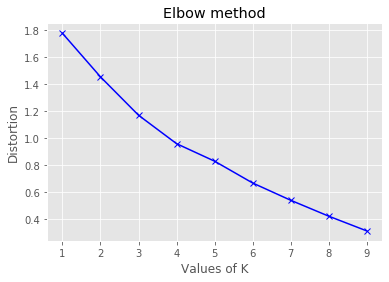

In [44]:
elbowMethod(acon_grouped_cluster)

In [70]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit(acon_grouped_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score(acon_grouped_cluster, preds.labels_)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1385053820368671)
For n_clusters = 3, silhouette score is 0.14716157645804404)
For n_clusters = 4, silhouette score is 0.15925775731168912)
For n_clusters = 5, silhouette score is 0.137784664395708)
For n_clusters = 6, silhouette score is 0.12529762044858433)
For n_clusters = 7, silhouette score is 0.11965188885948716)
For n_clusters = 8, silhouette score is 0.11210892668730847)
For n_clusters = 9, silhouette score is 0.10475022604200813)


In [46]:
Ks_acon = 4 
kmeans = KMeans(n_clusters=Ks_acon, random_state=0)
kmeans.fit(acon_grouped_cluster)
kmeans.labels_

array([0, 3, 1, 1, 3, 1, 1, 0, 0, 2, 1, 1, 1, 1], dtype=int32)

In [47]:
acon_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_aconcagua = pd.merge(df, acon_venues_sorted, on = 'Comuna')
df_aconcagua['Comuna'] = df_aconcagua['Comuna'].str.strip()
df_aconcagua.at[10, 'Comuna'] = 'Llaillay'
df_aconcagua = pd.merge(df_aconcagua, n_venues, on = 'Comuna')
df_aconcagua

Provincia     Capital       Comuna   Latitude  Longitude  Cluster Labels  \
0    Los Andes   Los Andes  Calle Larga -32.855269 -70.626041               3   
1    Los Andes   Los Andes    Los Andes -32.833687 -70.598161               1   
2    Los Andes   Los Andes    Rinconada -32.833329 -70.688845               2   
3    Los Andes   Los Andes  San Esteban -32.799054 -70.579581               1   
4      Petorca    La Ligua      Cabildo -32.426591 -71.066330               0   
5      Petorca    La Ligua     La Ligua -32.449638 -71.231669               1   
6      Petorca    La Ligua       Papudo -32.507568 -71.445958               1   
7      Petorca    La Ligua      Petorca -32.251699 -70.930910               0   
8      Petorca    La Ligua     Zapallar -32.552829 -71.458818               1   
9   San Felipe  San Felipe       Catemu -32.778421 -70.963343               1   
10  San Felipe  San Felipe     Llaillay -32.841742 -70.953908               3   
11  San Felipe  San Felipe     Putaendo -32.626077 -70.716764               0   
12  San Felipe  San Felipe   San Felipe -32.750717 -70.725090               1   
13  San Felipe  San Felipe  Santa María -32.747875 -70.656738               1   

   1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
0         Soccer Stadium          Food & Drink Shop                 Plaza   
1             Restaurant           Sushi Restaurant                   Pub   
2           Cocktail Bar           Sushi Restaurant                Bakery   
3                Brewery              Hot Dog Joint            Playground   
4             Restaurant                      Plaza           Bus Station   
5         Sandwich Place                      Plaza            Restaurant   
6                  Beach                 Restaurant    Seafood Restaurant   
7             Restaurant                        Pub              Pharmacy   
8     Seafood Restaurant                  Gastropub         Grocery Store   
9    Peruvian Restaurant                      Plaza         Grocery Store   
10     Food & Drink Shop                      Field                 Plaza   
11            Restaurant  Latin American Restaurant                  Park   
12                 Diner           Sushi Restaurant                  Café   
13            Restaurant                      Plaza      Football Stadium   

   4th Most Common Venue  Venue  
0      Convenience Store      4  
1            Pizza Place     42  
2                  Plaza      4  
3                  Plaza      4  
4           Tennis Court      5  
5   Fast Food Restaurant     19  
6            Coffee Shop     31  
7                  Plaza      6  
8           Tennis Court     18  
9      Convenience Store      7  
10              Pharmacy      5  
11          Liquor Store      7  
12    Chinese Restaurant     38  
13                Hostel      6

In [48]:
aconcagua_map = folium.Map(location=[region_lat, region_long], zoom_start=8.5)

vregion_geo = r'Vregion.json'

aconcagua_map.choropleth(
    geo_data=vregion_geo,
    data=df_aconcagua,
    columns=['Comuna','Venue'],
    key_on= 'feature.properties.NOM_COM',
    threshold_scale = [0, 20, 40, 60, 80, 100],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Venues')

x = np.arange(Ks_acon)
ys = [i + x + (i*x)**2 for i in range(Ks_acon)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add makers to the map
markers_colors = []
for lat, lon, com, cluster in zip(df_aconcagua['Latitude'], df_aconcagua['Longitude'], df_aconcagua['Comuna'], df_aconcagua['Cluster Labels']):
    label = folium.Popup(str(com) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                       radius=10,
                       popup=label,
                       color=rainbow[cluster-1],
                       fill=True,
                       fill_color=rainbow[cluster-1],
                       fill_opacity=0.7).add_to(aconcagua_map)  



aconcagua_map

In [49]:
df_aconcagua.loc[df_aconcagua['Cluster Labels'] == 0, df_aconcagua.columns[[2] + list(range(5, df_aconcagua.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue      2nd Most Common Venue  \
4    Cabildo               0            Restaurant                      Plaza   
7    Petorca               0            Restaurant                        Pub   
11  Putaendo               0            Restaurant  Latin American Restaurant   

   3rd Most Common Venue 4th Most Common Venue  Venue  
4            Bus Station          Tennis Court      5  
7               Pharmacy                 Plaza      6  
11                  Park          Liquor Store      7

In [50]:
df_aconcagua.loc[df_aconcagua['Cluster Labels'] == 1, df_aconcagua.columns[[2] + list(range(5, df_aconcagua.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1     Los Andes               1            Restaurant      Sushi Restaurant   
3   San Esteban               1               Brewery         Hot Dog Joint   
5      La Ligua               1        Sandwich Place                 Plaza   
6        Papudo               1                 Beach            Restaurant   
8      Zapallar               1    Seafood Restaurant             Gastropub   
9        Catemu               1   Peruvian Restaurant                 Plaza   
12   San Felipe               1                 Diner      Sushi Restaurant   
13  Santa María               1            Restaurant                 Plaza   

   3rd Most Common Venue 4th Most Common Venue  Venue  
1                    Pub           Pizza Place     42  
3             Playground                 Plaza      4  
5             Restaurant  Fast Food Restaurant     19  
6     Seafood Restaurant           Coffee Shop     31  
8          Grocery Store          Tennis Court     18  
9          Grocery Store     Convenience Store      7  
12                  Café    Chinese Restaurant     38  
13      Football Stadium                Hostel      6

In [51]:
df_aconcagua.loc[df_aconcagua['Cluster Labels'] == 2, df_aconcagua.columns[[2] + list(range(5, df_aconcagua.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2  Rinconada               2          Cocktail Bar      Sushi Restaurant   

  3rd Most Common Venue 4th Most Common Venue  Venue  
2                Bakery                 Plaza      4

In [52]:
df_aconcagua.loc[df_aconcagua['Cluster Labels'] == 3, df_aconcagua.columns[[2] + list(range(5, df_aconcagua.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0   Calle Larga               3        Soccer Stadium     Food & Drink Shop   
10     Llaillay               3     Food & Drink Shop                 Field   

   3rd Most Common Venue 4th Most Common Venue  Venue  
0                  Plaza     Convenience Store      4  
10                 Plaza              Pharmacy      5

We have 4 cluster for the Aconcagua Region. This cluster is separated by differents categories and we named as follows:
- Cluster 0: North rural places.
- Cluster 1: Multiple tourist and city venues.
- Cluster 2: Casino and rural places.
- Cluster 3: South rural places.

# New Valparaíso Region 

Now we will analyze the new Valparaíso region.


In [53]:
valp_categories = Vregion_venues[~Vregion_venues['Provincia'].isin(['Los Andes', 'Petorca', 'San Felipe'])]
valp_categories.head()

Provincia      Comuna  Comuna Latitude  Comuna Longitude  \
133  Quillota    Hijuelas       -32.800058        -71.145221   
134  Quillota    Hijuelas       -32.800058        -71.145221   
135  Quillota    Hijuelas       -32.800058        -71.145221   
136  Quillota    Hijuelas       -32.800058        -71.145221   
137  Quillota   La Calera       -32.788981        -71.203546   

                             Venue  Venue Latitude  Venue Longitude  \
133        Plaza De Armas Hijuelas      -32.800139       -71.145226   
134                       VIBROTEM      -32.798002       -71.143721   
135            Parque los naranjos      -32.796036       -71.143102   
136  Estadio Municipal De Hijuelas      -32.805418       -71.143398   
137               Express de Líder      -32.787572       -71.197707   

                 Venue Category  
133                       Plaza  
134  Construction & Landscaping  
135                        Park  
136              Soccer Stadium  
137                 Supermarket

In [54]:
valp_categories.shape

(564, 8)

564 venues.

In [55]:
valp_onehot = pd.get_dummies(valp_categories[['Venue Category']], prefix="", prefix_sep="")

valp_onehot['Comuna'] = valp_categories['Comuna']

fixed_columns = [valp_onehot.columns[-1]] + list(valp_onehot.columns[:-1])
valp_onehot = valp_onehot[fixed_columns]
valp_onehot = valp_onehot.groupby('Comuna').mean().reset_index()

valp_onehot

Comuna    Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0        Algarrobo  0.000000         0.00    0.000000             0.000000   
1        Cartagena  0.000000         0.00    0.000000             0.000000   
2       Casablanca  0.000000         0.00    0.000000             0.000000   
3           Concón  0.000000         0.00    0.000000             0.000000   
4        El Quisco  0.000000         0.00    0.000000             0.033333   
5          El Tabo  0.000000         0.00    0.000000             0.090909   
6         Hijuelas  0.000000         0.00    0.000000             0.000000   
7        La Calera  0.000000         0.00    0.000000             0.000000   
8          La Cruz  0.000000         0.00    0.000000             0.000000   
9          Limache  0.000000         0.00    0.071429             0.000000   
10         Nogales  0.000000         0.00    0.000000             0.000000   
11           Olmué  0.000000         0.00    0.000000             0.000000   
12      Puchuncaví  0.000000         0.00    0.000000             0.000000   
13        Quillota  0.000000         0.00    0.000000             0.000000   
14         Quilpué  0.017544         0.00    0.000000             0.000000   
15        Quintero  0.000000         0.00    0.000000             0.000000   
16     San Antonio  0.000000         0.00    0.000000             0.000000   
17      Valparaíso  0.000000         0.01    0.000000             0.000000   
18   Villa Alemana  0.000000         0.00    0.000000             0.000000   
19    Viña del Mar  0.011364         0.00    0.011364             0.011364   

    Asian Restaurant  Athletics & Sports  Austrian Restaurant  BBQ Joint  \
0              0.000             0.00000                 0.00   0.000000   
1              0.000             0.00000                 0.00   0.000000   
2              0.000             0.00000                 0.00   0.000000   
3              0.000             0.00000                 0.00   0.000000   
4              0.000             0.00000                 0.00   0.000000   
5              0.000             0.00000                 0.00   0.000000   
6              0.000             0.00000                 0.00   0.000000   
7              0.000             0.00000                 0.00   0.000000   
8              0.125             0.00000                 0.00   0.000000   
9              0.000             0.00000                 0.00   0.000000   
10             0.000             0.00000                 0.00   0.000000   
11             0.000             0.00000                 0.00   0.000000   
12             0.000             0.00000                 0.00   0.000000   
13             0.000             0.00000                 0.00   0.027027   
14             0.000             0.00000                 0.00   0.000000   
15             0.000             0.00000                 0.00   0.000000   
16             0.000             0.00000                 0.00   0.000000   
17             0.000             0.00000                 0.01   0.010000   
18             0.000             0.02439                 0.00   0.000000   
19             0.000             0.00000                 0.00   0.000000   

    Bagel Shop  ...  Supermarket  Surf Spot  Sushi Restaurant  Tea Room  \
0     0.000000  ...     0.038462   0.000000          0.000000  0.000000   
1     0.000000  ...     0.000000   0.000000          0.000000  0.000000   
2     0.000000  ...     0.000000   0.000000          0.000000  0.000000   
3     0.000000  ...     0.000000   0.025000          0.000000  0.000000   
4     0.000000  ...     0.000000   0.000000          0.000000  0.000000   
5     0.000000  ...     0.000000   0.045455          0.000000  0.000000   
6     0.000000  ...     0.000000   0.000000          0.000000  0.000000   
7     0.000000  ...     0.250000   0.000000          0.000000  0.000000   
8     0.000000  ...     0.000000   0.000000          0.000000  0.000000   
9     0.000000  ...     0.

In [56]:
num_top_venues = 4

indicators =['st', 'nd', 'rd']

columns = ['Comuna']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
valp_venues_sorted = pd.DataFrame(columns=columns)
valp_venues_sorted['Comuna'] = valp_onehot['Comuna']

for ind in np.arange(valp_onehot.shape[0]):
    valp_venues_sorted.iloc[ind, 1:] = return_most_common_venues(valp_onehot.iloc[ind, :], num_top_venues)
    
valp_venues_sorted

Comuna 1st Most Common Venue  2nd Most Common Venue  \
0        Algarrobo            Restaurant                 Bakery   
1        Cartagena            Restaurant     Seafood Restaurant   
2       Casablanca         Grocery Store               Pharmacy   
3           Concón    Seafood Restaurant             Restaurant   
4        El Quisco    Seafood Restaurant                  Beach   
5          El Tabo    Seafood Restaurant                  Beach   
6         Hijuelas                  Park                  Plaza   
7        La Calera        Soccer Stadium            Supermarket   
8          La Cruz              Pharmacy       Asian Restaurant   
9          Limache           Supermarket               Pharmacy   
10         Nogales        Scenic Lookout  Outdoors & Recreation   
11           Olmué                 Hotel                 Resort   
12      Puchuncaví                 Diner              Nightclub   
13        Quillota                   Bar       Sushi Restaurant   
14         Quilpué            Restaurant               Pharmacy   
15        Quintero  Fast Food Restaurant               Pharmacy   
16     San Antonio            Restaurant     Seafood Restaurant   
17      Valparaíso            Restaurant                    Bar   
18   Villa Alemana            Restaurant       Sushi Restaurant   
19    Viña del Mar       Bed & Breakfast   Fast Food Restaurant   

         3rd Most Common Venue      4th Most Common Venue  
0                  Pizza Place                Fish Market  
1                        Beach                   Pharmacy  
2           Basketball Stadium         Chinese Restaurant  
3                       Bakery        Empanada Restaurant  
4                   Restaurant                  Nightclub  
5          Arts & Crafts Store                 Restaurant  
6   Construction & Landscaping             Soccer Stadium  
7                Moving Target                Yoga Studio  
8        Outdoors & Recreation                Coffee Shop  
9                 Soccer Field          Food & Drink Shop  
10                       Trail              Shopping Mall  
11                  Restaurant  Latin American Restaurant  
12                       Plaza                      Beach  
13                        Café                        Gym  
14                         Pub             Sandwich Place  
15                       Beach            Harbor / Marina  
16              Sandwich Place             Breakfast Spot  
17                        Café                Pizza Place  
18              Sandwich Place                        Bar  
19              Ice Cream Shop                Coffee Shop

In [57]:
valp_grouped_cluster = valp_onehot.drop('Comuna', 1)
valp_grouped_cluster.head()

Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0     0.0          0.0         0.0             0.000000               0.0   
1     0.0          0.0         0.0             0.000000               0.0   
2     0.0          0.0         0.0             0.000000               0.0   
3     0.0          0.0         0.0             0.000000               0.0   
4     0.0          0.0         0.0             0.033333               0.0   

   Athletics & Sports  Austrian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0                 0.0                  0.0        0.0         0.0  0.115385   
1                 0.0                  0.0        0.0         0.0  0.090909   
2                 0.0                  0.0        0.0         0.0  0.000000   
3                 0.0                  0.0        0.0         0.0  0.050000   
4                 0.0                  0.0        0.0         0.0  0.033333   

   ...  Supermarket  Surf Spot  Sushi Restaurant  Tea Room  Theater  Trail  \
0  ...     0.038462      0.000               0.0       0.0      0.0    0.0   
1  ...     0.000000      0.000               0.0       0.0      0.0    0.0   
2  ...     0.000000      0.000               0.0       0.0      0.1    0.0   
3  ...     0.000000      0.025               0.0       0.0      0.0    0.0   
4  ...     0.000000      0.000               0.0       0.0      0.0    0.0   

   Train Station  Vegetarian / Vegan Restaurant  Vineyard  Yoga Studio  
0            0.0                            0.0       0.0          0.0  
1            0.0                            0.0       0.0          0.0  
2            0.0                            0.0       0.1          0.0  
3            0.0                            0.0       0.0          0.0  
4            0.0                            0.0       0.0          0.0  

[5 rows x 128 columns]

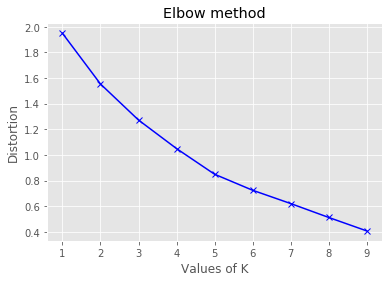

In [58]:
elbowMethod(valp_grouped_cluster)

In [59]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit(valp_grouped_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score(valp_grouped_cluster, preds.labels_)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2707450266954129)
For n_clusters = 3, silhouette score is 0.18801471063088485)
For n_clusters = 4, silhouette score is 0.197850244918719)
For n_clusters = 5, silhouette score is 0.20020508796320802)
For n_clusters = 6, silhouette score is 0.17182378982969548)
For n_clusters = 7, silhouette score is 0.16074846109050836)
For n_clusters = 8, silhouette score is 0.17065892494013446)
For n_clusters = 9, silhouette score is 0.1758910336474743)


In [60]:
Ks_valp = 2
kmeans = KMeans(n_clusters=Ks_valp, random_state=0)
kmeans.fit(valp_grouped_cluster)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [61]:
valp_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_valparaiso = pd.merge(df, valp_venues_sorted, on = 'Comuna')
df_valparaiso['Comuna'] = df_valparaiso['Comuna'].str.strip()
df_valparaiso.at[1, 'Comuna'] = 'Calera'
df_valparaiso = pd.merge(df_valparaiso, n_venues, on = 'Comuna')
df_valparaiso

Provincia      Capital         Comuna   Latitude  Longitude  \
0      Quillota     Quillota       Hijuelas -32.800058 -71.145221   
1      Quillota     Quillota         Calera -32.788981 -71.203546   
2      Quillota     Quillota        La Cruz -32.827912 -71.227153   
3      Quillota     Quillota        Nogales -32.731580 -71.202947   
4      Quillota     Quillota       Quillota -32.879997 -71.247355   
5   San Antonio  San Antonio      Algarrobo -33.369172 -71.668053   
6   San Antonio  San Antonio      Cartagena -33.546849 -71.603171   
7   San Antonio  San Antonio      El Quisco -33.400311 -71.693998   
8   San Antonio  San Antonio        El Tabo -33.454585 -71.669107   
9   San Antonio  San Antonio    San Antonio -33.580861 -71.613238   
10   Valparaíso   Valparaíso     Casablanca -33.320586 -71.410076   
11   Valparaíso   Valparaíso         Concón -32.922004 -71.515957   
12   Valparaíso   Valparaíso     Puchuncaví -32.725986 -71.415007   
13   Valparaíso   Valparaíso       Quintero -32.784022 -71.528336   
14   Valparaíso   Valparaíso     Valparaíso -33.045846 -71.619675   
15   Valparaíso   Valparaíso   Viña del Mar -33.024453 -71.551764   
16  Marga Marga      Quilpué        Limache -33.001874 -71.265732   
17  Marga Marga      Quilpué          Olmué -32.995618 -71.186211   
18  Marga Marga      Quilpué        Quilpué -33.049813 -71.441528   
19  Marga Marga      Quilpué  Villa Alemana -33.044190 -71.372546   

    Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
0                1                  Park                  Plaza   
1                1        Soccer Stadium            Supermarket   
2                0              Pharmacy       Asian Restaurant   
3                0        Scenic Lookout  Outdoors & Recreation   
4                0                   Bar       Sushi Restaurant   
5                0            Restaurant                 Bakery   
6                0            Restaurant     Seafood Restaurant   
7                0    Seafood Restaurant                  Beach   
8                0    Seafood Restaurant                  Beach   
9                0            Restaurant     Seafood Restaurant   
10               0         Grocery Store               Pharmacy   
11               0    Seafood Restaurant             Restaurant   
12               0                 Diner              Nightclub   
13               0  Fast Food Restaurant               Pharmacy   
14               0            Restaurant                    Bar   
15               0       Bed & Breakfast   Fast Food Restaurant   
16               0           Supermarket               Pharmacy   
17               0                 Hotel                 Resort   
18               0            Restaurant               Pharmacy   
19               0            Restaurant       Sushi Restaurant   

         3rd Most Common Venue      4th Most Common Venue  Venue  
0   Construction & Landscaping             Soccer Stadium      4  
1                Moving Target                Yoga Studio      4  
2        Outdoors & Recreation                Coffee Shop      8  
3                        Trail              Shopping Mall      9  
4                         Café                        Gym     37  
5                  Pizza Place                Fish Market     26  
6                        Beach                   Pharmacy     11  
7                   Restaurant                  Nightclub     30  
8          Arts & Crafts Store                 Restaurant     22  
9               Sandwich Place             Breakfast Spot     29  
10          Basketball Stadium         Chinese Restaurant     10  
11                      Bakery        Empanada Restaurant     40  
12                       Plaza                      Beach      4  
13                       Beach            Harbor / Marina     15  
14                        Café                Pizza Place    100  
15              Ice Cream Shop                Coffee Shop     88  
16       

In [62]:
valp_map = folium.Map(location=[region_lat, region_long], zoom_start=8.5)

vregion_geo = r'Vregion.json'

valp_map.choropleth(
    geo_data=vregion_geo,
    data=df_valparaiso,
    columns=['Comuna','Venue'],
    key_on= 'feature.properties.NOM_COM',
    threshold_scale = [0, 20, 40, 60, 80, 101],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight = True,
    legend_name='Number of Venues')

x = np.arange(Ks_valp)
ys = [i + x + (i*x)**2 for i in range(Ks_valp)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add makers to the map
markers_colors = []
for lat, lon, com, cluster in zip(df_valparaiso['Latitude'], df_valparaiso['Longitude'], df_valparaiso['Comuna'], df_valparaiso['Cluster Labels']):
    label = folium.Popup(str(com) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                       radius=10,
                       popup=label,
                       color=rainbow[cluster-1],
                       fill=True,
                       fill_color=rainbow[cluster-1],
                       fill_opacity=0.7).add_to(valp_map)  



valp_map

In [63]:
df_valparaiso.loc[df_valparaiso['Cluster Labels'] == 0, df_valparaiso.columns[[2] + list(range(5, df_valparaiso.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue  \
2         La Cruz               0              Pharmacy   
3         Nogales               0        Scenic Lookout   
4        Quillota               0                   Bar   
5       Algarrobo               0            Restaurant   
6       Cartagena               0            Restaurant   
7       El Quisco               0    Seafood Restaurant   
8         El Tabo               0    Seafood Restaurant   
9     San Antonio               0            Restaurant   
10     Casablanca               0         Grocery Store   
11         Concón               0    Seafood Restaurant   
12     Puchuncaví               0                 Diner   
13       Quintero               0  Fast Food Restaurant   
14     Valparaíso               0            Restaurant   
15   Viña del Mar               0       Bed & Breakfast   
16        Limache               0           Supermarket   
17          Olmué               0                 Hotel   
18        Quilpué               0            Restaurant   
19  Villa Alemana               0            Restaurant   

    2nd Most Common Venue  3rd Most Common Venue      4th Most Common Venue  \
2        Asian Restaurant  Outdoors & Recreation                Coffee Shop   
3   Outdoors & Recreation                  Trail              Shopping Mall   
4        Sushi Restaurant                   Café                        Gym   
5                  Bakery            Pizza Place                Fish Market   
6      Seafood Restaurant                  Beach                   Pharmacy   
7                   Beach             Restaurant                  Nightclub   
8                   Beach    Arts & Crafts Store                 Restaurant   
9      Seafood Restaurant         Sandwich Place             Breakfast Spot   
10               Pharmacy     Basketball Stadium         Chinese Restaurant   
11             Restaurant                 Bakery        Empanada Restaurant   
12              Nightclub                  Plaza                      Beach   
13               Pharmacy                  Beach            Harbor / Marina   
14                    Bar                   Café                Pizza Place   
15   Fast Food Restaurant         Ice Cream Shop                Coffee Shop   
16               Pharmacy           Soccer Field          Food & Drink Shop   
17                 Resort             Restaurant  Latin American Restaurant   
18               Pharmacy                    Pub             Sandwich Place   
19       Sushi Restaurant         Sandwich Place                        Bar   

    Venue  
2       8  
3       9  
4      37  
5      26  
6      11  
7      30  
8      22  
9      29  
10     10  
11     40  
12      4  
13     15  
14    100  
15     88  
16     14  
17     15  
18     57  
19     41

In [64]:
df_valparaiso.loc[df_valparaiso['Cluster Labels'] == 1, df_valparaiso.columns[[2] + list(range(5, df_valparaiso.shape[1]))]]

Comuna  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  Hijuelas               1                  Park                 Plaza   
1    Calera               1        Soccer Stadium           Supermarket   

        3rd Most Common Venue 4th Most Common Venue  Venue  
0  Construction & Landscaping        Soccer Stadium      4  
1               Moving Target           Yoga Studio      4

In this segmentation we have 2 cluster for the communes of Valparaíso Region.
This will be named as: 
- Cluster 0: Multiple tourist and city places.
- Cluster 1: Rural places.


In [65]:
region_cate = Vregion_venues.groupby('Venue Category').count()
region_cate = region_cate.loc[:, ['Comuna']]
region_cate.rename(columns={'Comuna': 'Region Total'}, inplace = True)

aconc_cat = acon_categories.groupby('Venue Category').count()
aconc_cat = aconc_cat.loc[:, ['Comuna']]
aconc_cat.rename(columns={'Comuna': 'Aconcagua'}, inplace = True)

val_cat = valp_categories.groupby('Venue Category').count()
val_cat = val_cat.loc[:, ['Comuna']]
val_cat.rename(columns={'Comuna': 'Valparaíso'}, inplace=True)


In [66]:
ranking_val= val_cat.sort_values('Valparaíso', ascending=False)
ranking_val.head(15)

Valparaíso
Venue Category                  
Restaurant                    47
Seafood Restaurant            37
Pharmacy                      20
Plaza                         20
Café                          18
Sandwich Place                17
Bar                           17
Sushi Restaurant              15
Pizza Place                   15
Fast Food Restaurant          15
Beach                         14
Bakery                        12
Pub                           12
Hotel                         12
Coffee Shop                    9

In [67]:
ranking_acon= aconc_cat.sort_values('Aconcagua', ascending=False)
ranking_acon.head(15)

Aconcagua
Venue Category                      
Restaurant                        19
Plaza                             15
Seafood Restaurant                 7
Pharmacy                           7
Sushi Restaurant                   7
Pizza Place                        6
Sandwich Place                     6
Beach                              6
Ice Cream Shop                     6
Diner                              6
Café                               6
Food & Drink Shop                  5
Fast Food Restaurant               5
Grocery Store                      5
Latin American Restaurant          5

In [68]:
ranking_region = region_cate.sort_values('Region Total', ascending=False)
ranking_region.head(15)

Region Total
Venue Category                    
Restaurant                      66
Seafood Restaurant              44
Plaza                           35
Pharmacy                        27
Café                            24
Sandwich Place                  23
Sushi Restaurant                22
Pizza Place                     21
Fast Food Restaurant            20
Beach                           20
Bar                             18
Hotel                           16
Bakery                          15
Pub                             15
Ice Cream Shop                  13

# Results and Discussion

In discussion, we get the information with Foursquare API, that is not very popular. We have venues but in a tourist way, so this project is not very complete to compare institutional venues, colleges venues and so on. But we could focus in a general way and represent the final propose. 
After that we separated the region, we find different characteristics to compare and analyze. In more details, we compare the new regions to understand witch category venues is in each location. In a simple view we have similar places in these communes, but the difference is in the amount. This happens because the centralism is in the capital (Valparaíso), and it decreasing in an east direction. Although we find communes with big cities places, the amount is very lowest in comparison with the west cities. 
In a general summary the K-means model was used the separate the communes depending of its number of venues. Although in the Aconcagua case there be more characteristics, the same criteria was used.   
In some cases there are communes with a low number of venues in the cluster with big numbers of venues. This happened because some particular category would be connected with another commune in this group.     
This tell us that the Aconcagua regions **can be a different region** because is not very populated and have more space to integrate new opportunities and support a new generation to this valley. The Aconcagua Region in comparison to the new Valparaíso Region had communes with low density of venues and therefore we can infer that this communes have a small urban development. 


# Conclusion
Chile is a country where the centralism works in a fear way. Just in the Metropolitan Region 6 millions of people approximately lives and in Valparaíso Region (2nd place in the ranking of population) has around 2 million. Almost the 50% of the population in all country and this allows inequality and lack of opportunities. This is the principal reason for the stakeholders start with the idea to separate the region in these two new regions. 
In another hand, if we had the Aconcagua Region, the population will have a significant increase due to the new jobs and opportunities and this could be a problem for the life of these zones because in a most part is nature. So, if we'll carefully and respectful would build a new region with control and results of its work.
